In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("../../01.files/02.Bigsata_analysis/IRIS.csv", encoding = 'euc-kr')
raw_data.head(5)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
raw_data['SPECIES'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df_raw_x = raw_data.drop("SPECIES",axis=1)
df_raw_y = raw_data["SPECIES"]
df_raw_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

In [ ]:
### 변수간 선형관계 확인 및 상관계수 확인
1. PETAL_LENGTH의 경우 PETAL_WIDTH, SEPAL_LENGTH와 양의 선형관계가 확인됨
2. 상관계수 또한 

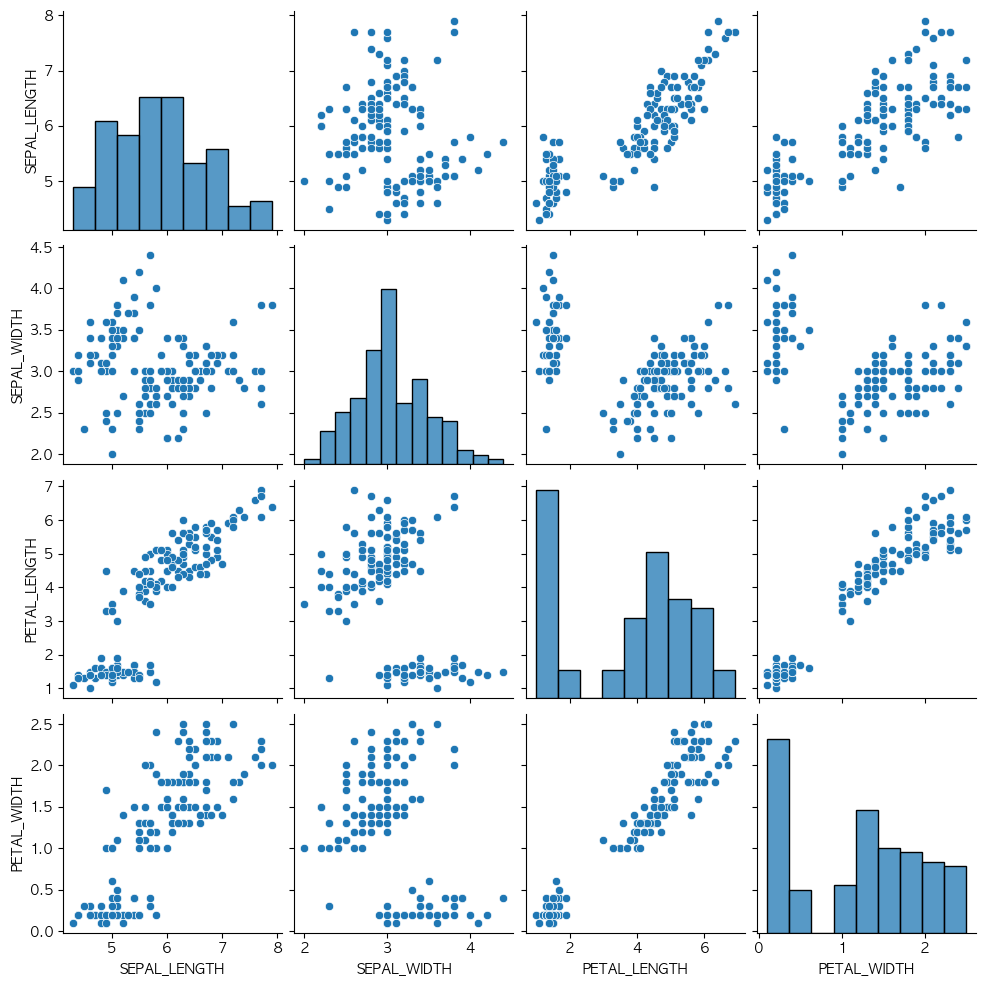

In [6]:
sns.pairplot(df_raw_x)

In [7]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


### 데이터 스케일링 및 확인

스케일링 이후에 평균이 0, 표준편차 또한 1로 표준화 된 것을 확인할 수 있다.

In [8]:
df_raw_x.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape :
 (150, 4)


In [18]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


### 주성분 분석

주성분을 분석하였을 때, Prin1로 정의된 첫번째 주성분의 영향이 가장 크며 혼자 73%를 차지하고 있음을 알 수 있다.    
두번째 주성분 또한 나머지 두개에 비해 높은 연관성을 보이고 있다.

상관계수 기준으로는 1개만 선택, 공분산 기준으로는 2개까지 선택가능하나 두가지를 선택하기로 결정하였다

In [11]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data :\n {}".format(nd_pca[:5]))
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape :
 (150, 4)


In [12]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [13]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


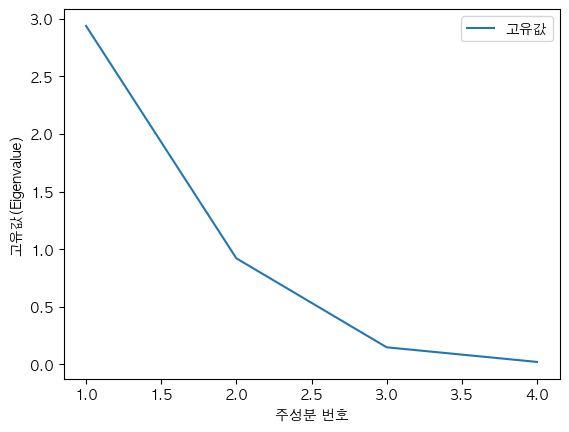

In [14]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [15]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


### 주성분 분석 결과

첫 주성분의 경우 그래프를 보았을 때 비슷한 유형의 분포가 보이지만, 상관계수를 분석하였을 때는    
서로 독립적임을 알 수 있다. 

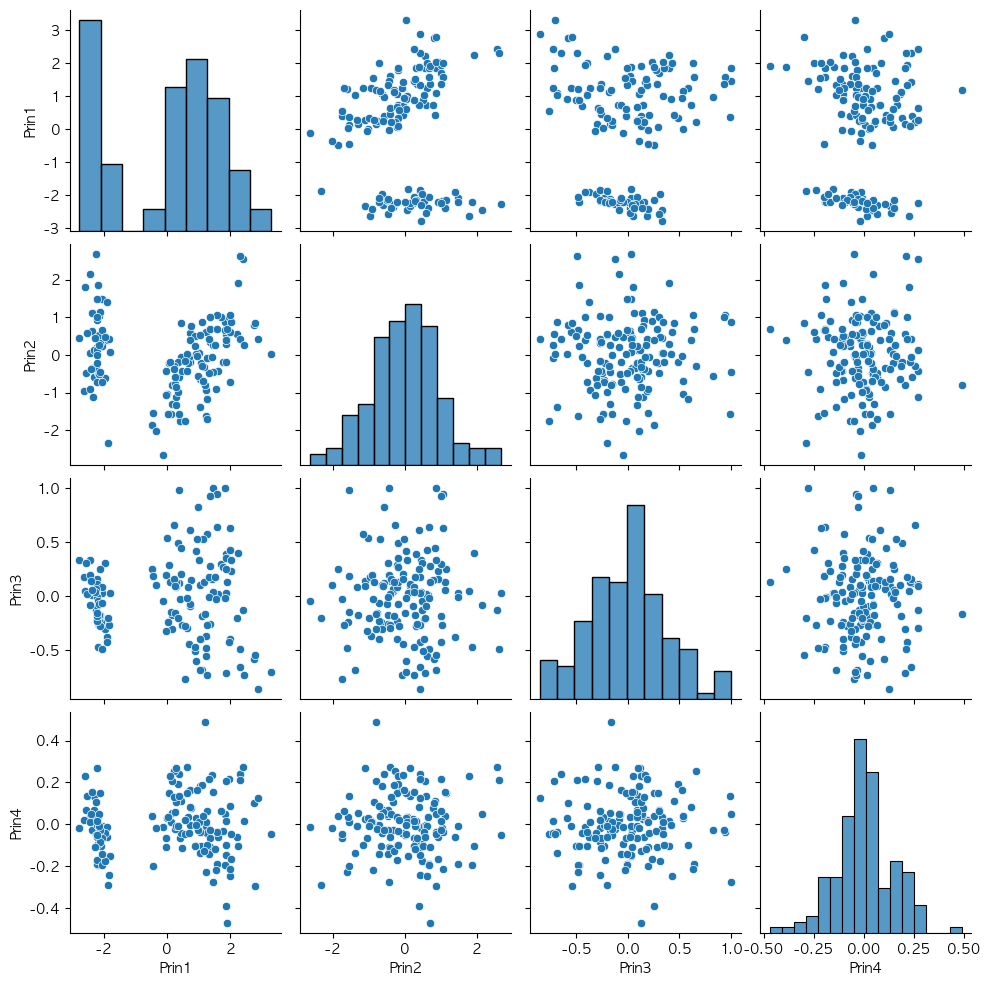

In [16]:
sns.pairplot(df_pca)

In [17]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,-0.0,-0.0,-0.0
Prin2,-0.0,1.0,-0.0,0.0
Prin3,-0.0,-0.0,1.0,0.0
Prin4,-0.0,0.0,0.0,1.0
